In [46]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

ModuleNotFoundError: No module named 'catboost'

In [3]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- Lets make a new column called total score and keep it as the Target column

In [4]:
df['total'] = df.math_score + df.reading_score + df.writing_score
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [6]:
df.drop(['math_score','reading_score','writing_score'], axis='columns', inplace=True)

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [56]:
x = df.drop('total',axis='columns')

In [9]:
y = df.total

In [12]:
df.gender.unique()        

array(['female', 'male'], dtype=object)

In [13]:
df.race_ethnicity.unique()                 

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [14]:
df.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [15]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [16]:
df.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

### From this we can see that since there are only few categories per feature, we can use one hot encoding
### If there was moree number of categories in one feature we need to use , **Target Guided Ordinal Encoding**

### the newxt steps:
#### We need to COnvert String to Numerical Values using ONe hot encoding
#### THen we need to normalize the dataset

#### All these processes can be done by creating a pipeline!

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [21]:
numeric_columns = x.select_dtypes(exclude="object").columns
character_columns = x.select_dtypes(include="object").columns

In [54]:
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', OneHotEncoder(),character_columns),
        ('MinMaxScaler',StandardScaler(),numeric_columns)
    ]
)

In [57]:
x=preprocessor.fit_transform(x)


In [35]:
x.shape

(1000, 17)

- Okay now we have got 17 columns and the numerical values in the columns are normalized or standardized

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [58]:
x_train.shape

(800, 17)

In [59]:
def evaluate(truth,prediction):
    mae = mean_absolute_error(truth,prediction)
    mse = mean_squared_error(truth,prediction)
    rmse = np.sqrt(mean_squared_error(truth,prediction))
    r2_square = r2_score(truth,prediction)
    return mae,rmse,r2_square

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

In [64]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 36.5870
- Mean Absolute Error: 29.8084
- R2 Score: 0.2543
Model performance for Test set
- Root Mean Squared Error: 40.2047
- Mean Absolute Error: 31.4705
- R2 Score: 0.1622
Lasso
Model performance for Training set
- Root Mean Squared Error: 37.3079
- Mean Absolute Error: 30.1134
- R2 Score: 0.2246
Model performance for Test set
- Root Mean Squared Error: 41.1526
- Mean Absolute Error: 32.2553
- R2 Score: 0.1222
Ridge
Model performance for Training set
- Root Mean Squared Error: 36.5871
- Mean Absolute Error: 29.8066
- R2 Score: 0.2543
Model performance for Test set
- Root Mean Squared Error: 40.2101
- Mean Absolute Error: 31.4788
- R2 Score: 0.1619
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 35.1892
- Mean Absolute Error: 28.0775
- R2 Score: 0.3102
Model performance for Test set
- Root Mean Squared Error: 46.7101
- Mean Absolute Error: 37.0180
- R2 Score: -0.1309
Dec

In [65]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Linear Regression,0.162172
7,Linear Regression,0.162172
9,Ridge,0.161946
2,Ridge,0.161946
1,Lasso,0.122201
8,Lasso,0.122201
6,AdaBoost Regressor,0.119690
13,AdaBoost Regressor,0.093025
12,Random Forest Regressor,-0.031237
5,Random Forest Regressor,-0.033243


### lets choose Linear Regression

In [67]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)
pred = model.predict(x_test)
score = r2_score(y_test, pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 16.22


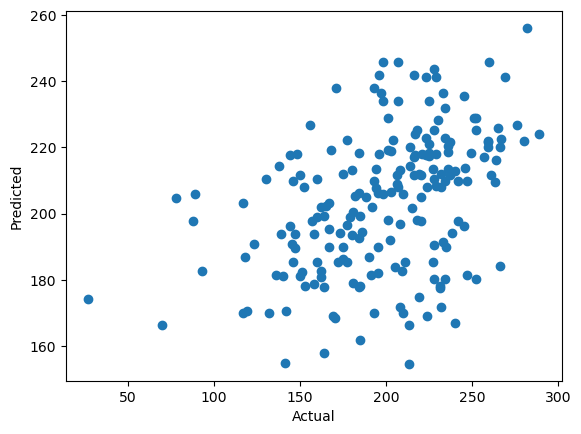

In [69]:
plt.scatter(y_test,pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

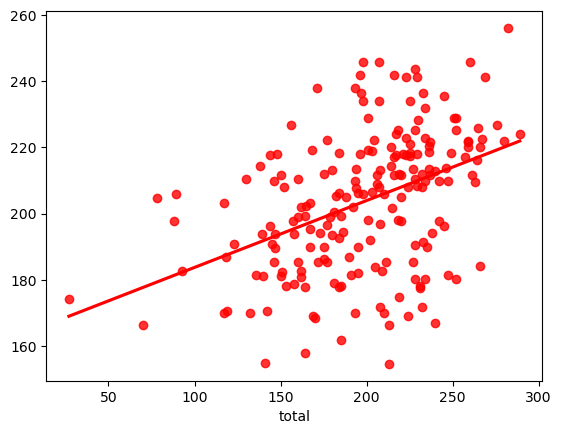

In [71]:
sns.regplot(x=y_test,y=pred,ci=None,color ='red');

In [73]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,211.568313,49.431687
737,192,201.842859,-9.842859
740,225,218.387815,6.612185
660,224,169.107492,54.892508
411,245,235.490388,9.509612
...,...,...,...
408,165,202.196274,-37.196274
332,171,238.052681,-67.052681
208,231,178.209770,52.790230
613,216,211.568313,4.431687
